/var/folders/29/w54hnxjs18q9cvq1pfzwym540000gn/T/ipykernel_8528/3499025065.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapped_df['color'] = mapped_df['agreement_class'].map(agreement_color_map).fillna('black')


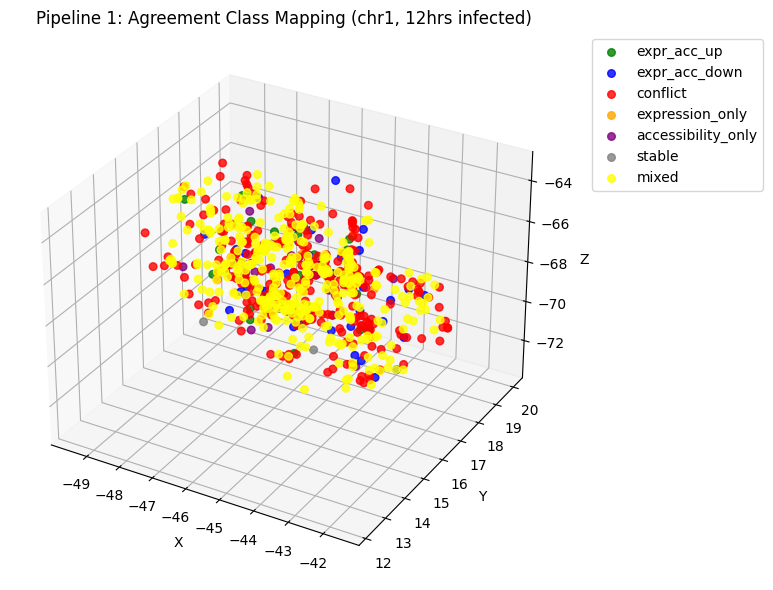

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
temporal_df = pd.read_csv("data/green_monkey/all_structure_files/chr1/temporal_data/chr1_temporal_trendCategories_valuePattern_curveFeatures.csv")
structure_df = pd.read_csv("data/green_monkey/all_structure_files/chr1/12hrs/vacv/structure_12hrs_vacv_gene_info.csv")

# Keep only needed columns from temporal data
temporal_subset = temporal_df[['gene_name', 'agreement_class']]

# Merge with structure coordinates for matching genes
merged_df = pd.merge(structure_df, temporal_subset, on='gene_name', how='inner')

# Prepare data for mapping
mapped_df = merged_df[['gene_name', 'middle_x', 'middle_y', 'middle_z', 'agreement_class']]

# Define color mapping for agreement classes
agreement_color_map = {
    'expr_acc_up': 'green',
    'expr_acc_down': 'blue',
    'conflict': 'red',
    'expression_only': 'orange',
    'accessibility_only': 'purple',
    'stable': 'gray',
    'mixed': 'yellow'
}

mapped_df['color'] = mapped_df['agreement_class'].map(agreement_color_map).fillna('black')

# Plot static 3D scatter
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cls, color in agreement_color_map.items():
    subset = mapped_df[mapped_df['agreement_class'] == cls]
    ax.scatter(subset['middle_x'], subset['middle_y'], subset['middle_z'],
               c=color, label=cls, s=30, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Pipeline 1: Agreement Class Mapping (chr1, 12hrs infected)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
import trimesh
import numpy as np

# Load the mesh from OBJ
mesh = trimesh.load("data/green_monkey/all_structure_files/chr1/spatial_data/overall_shapes/chr1_12hrs_vacv_metaball.obj")

# Extract vertices
vertices = np.array(mesh.vertices)

# Gene coordinates and agreement class mapped_df
gene_coords = mapped_df[['middle_x', 'middle_y', 'middle_z']].values
gene_classes = mapped_df['agreement_class'].values

# Map agreement classes to colors (RGB)
color_map_rgb = {
    'expr_acc_up': (0, 255, 0),       # green
    'expr_acc_down': (0, 0, 255),     # blue
    'conflict': (255, 0, 0),          # red
    'expression_only': (255, 165, 0), # orange
    'accessibility_only': (128, 0, 128), # purple
    'stable': (128, 128, 128),        # gray
    'mixed': (255, 255, 0),           # yellow
}

# Assign nearest gene to each mesh vertex
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=1).fit(gene_coords)
distances, indices = nn.kneighbors(vertices)

# Map vertices to gene agreement class
vertex_classes = gene_classes[indices[:, 0]]

# Convert classes to RGB colors
vertex_colors = np.array([color_map_rgb.get(cls, (0, 0, 0)) for cls in vertex_classes], dtype=np.uint8)

# Add vertex colors to the mesh
mesh.visual.vertex_colors = vertex_colors

# Export the colored mesh to a new OBJ for viewing
output_path = "data/green_monkey/all_structure_files/chr1/spatial_data/agreement_class/aachr1_12hrs_vacv_agreement_class_colored.obj"
mesh.export(output_path)

output_path


'data/green_monkey/all_structure_files/chr1/spatial_data/agreement_class/aachr1_12hrs_vacv_agreement_class_colored.obj'

In [10]:
import trimesh

# Load the colored mesh
mesh = trimesh.load("data/green_monkey/all_structure_files/chr1/spatial_data/agreement_class/aachr1_12hrs_vacv_agreement_class_colored.obj")
print(mesh.vertices.shape, mesh.faces.shape)
print(mesh.is_watertight, mesh.is_winding_consistent)

# Create a scene
scene = trimesh.Scene(mesh)

# Show in JupyterLab (interactive WebGL)
scene.show()


(15262, 3) (30536, 3)
True True


In [ ]:
(15262, 3) (30536, 3)